In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
austin_file_path = os.path.join("weather_data_austin_2010.csv")
df = pd.read_csv(austin_file_path, sep = ",", parse_dates = True, index_col= "Date")

In [84]:
df.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [85]:
austin_file_path2 = os.path.join("NOAA_QCLCD_2011_hourly_13904.txt")
df1 = pd.read_csv(austin_file_path2, sep=",", header= None)
df1.columns= ['Wban', 'date', 'Time', 'StationType', 'sky_condition', 'sky_conditionFlag', 'visibility', 
              'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 'dry_bulb_faren', 
              'dry_bulb_farenFlag', 'dry_bulb_cel', 'dry_bulb_celFlag', 'wet_bulb_faren', 'wet_bulb_farenFlag', 
              'wet_bulb_cel', 'wet_bulb_celFlag', 'dew_point_faren', 'dew_point_farenFlag', 'dew_point_cel', 
              'dew_point_celFlag', 'relative_humidity', 'relative_humidityFlag', 'wind_speed', 'wind_speedFlag', 
              'wind_direction', 'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 
              'station_pressure', 'station_pressureFlag', 'pressure_tendency', 'pressure_tendencyFlag', 
              'presschange', 'presschangeFlag', 'sea_level_pressure', 'sea_level_pressureFlag','record_type', 
              'hourly_precip','hourly_precipFlag', 'altimeter', 'altimeterFlag', 'junk']
df1.head()


,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [86]:
list_to_drop = ['sky_conditionFlag', 'visibilityFlag', 'wx_and_obst_to_vision', 'wx_and_obst_to_visionFlag', 
                'dry_bulb_farenFlag', 'dry_bulb_celFlag', 'wet_bulb_farenFlag', 'wet_bulb_celFlag', 
                'dew_point_farenFlag', 'dew_point_celFlag', 'relative_humidityFlag', 'wind_speedFlag', 
                'wind_directionFlag', 'value_for_wind_character', 'value_for_wind_characterFlag', 
                'station_pressureFlag','pressure_tendencyFlag', 'pressure_tendency', 'presschange',
                'presschangeFlag', 'sea_level_pressureFlag','hourly_precip','hourly_precipFlag', 'altimeter', 
                'record_type', 'altimeterFlag', 'junk']
df1.drop(list_to_drop, axis=1, inplace= True)

In [87]:
df1.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [88]:
df1.date = df1.date.astype(str)
df1.Time = df1.Time.apply(lambda x: "{:0>4}".format(x))
date_string = df1.date + df1.Time
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')

# Set the index to be the new date_times container: df_clean
df_clean = df1.set_index(date_times)

# Print the output of df_clean.head()
(df_clean.head())

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [89]:
df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00' ,"dry_bulb_faren"]

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

In [90]:
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean['dry_bulb_faren'], errors= "coerce")
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean.wind_speed, errors="coerce")
df_clean['dew_point_faren'] = pd.to_numeric(df_clean.dew_point_faren, errors="coerce")

In [91]:
df_clean.loc['2011-6-20 8:00:00':'2011-6-20 9:00:00' ,"dry_bulb_faren"]

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [92]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample("D").mean()

# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011["dry_bulb_faren"].values

df_climate = df
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = df_climate.resample("D").mean()

# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()["Temperature"]

# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


In [93]:
# Select days that are sunny: sunny
sunny = df_clean.loc[df_clean["sky_condition"].str.contains("CLR")]
# Select days that are overcast: overcast
overcast = df_clean.loc[df_clean["sky_condition"].str.contains("OVC")]

# Resample sunny and overcast, aggregating by maximum daily temperature
sunny_daily_max = sunny.resample("D").max()
overcast_daily_max = overcast.resample("D").max()

# Print the difference between the mean of sunny_daily_max and overcast_daily_max
print(sunny_daily_max.mean() - overcast_daily_max.mean())

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


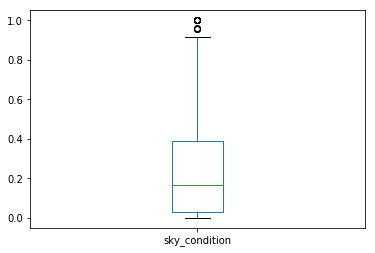

In [99]:
# Create a Boolean Series for sunny days: sunny
sunny = df_clean.sky_condition.str.contains("CLR")

# Resample the Boolean Series by day and compute the sum: sunny_hours
sunny_hours = sunny.resample("D").sum()

# Resample the Boolean Series by day and compute the count: total_hours
total_hours = sunny.resample("D").count()

# Divide sunny_hours by total_hours: sunny_fraction
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind="box")
plt.show()